In [ ]:
import tweepy as tw
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import nltk
from nltk.corpus import stopwords
import textblob
import re
from textblob import Word, TextBlob

!pip install tweepy
!pip install preprocessor
!pip install textblob
#run the the above in different cell each to install the library 
import os
import pandas as pd
import tweepy
import re
import string
from textblob import TextBlob
import preprocessor as p
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

!pip install -q wordcloud
import wordcloud

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import json
import time


consumer_key = 'a3AnYe7y8Ae7VudxvarsqkFLC'
consumer_secret = 'WwGbc0PfnaRPbhBOhu6VQrT0K5EcTD5TWXaNFevjXUnYy5Nn5H'
access_token = '235255464-hqy7unVvBsW2T9V8fiGzCQQWMYEX9eY3M3UCSuAH'
access_token_secret = 'DffQbz7OjifHuxeY3tUr5gjBmaFCxeaZhc7Yg0IWDE1LL'

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
hastag = ('@patagonia') #this is the name of the hashtag you want to do your sentiments anaysis on
query = tw.Cursor(api.search, q=hastag, lang="en", since="2015-09-16").items(1000)
tweets = [{'Tweets' : tweet.text, 'TimeStamp' : tweet.created_at} for tweet in query]

patagonia = pd.DataFrame.from_dict(tweets)

nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
custom_stop_words = ['RT'] #custom stop word is any word you do not want in your analysis eg @, on, to, etc

def preprocess_tweets(tweet, custom_stop_words):
  preproccessed_tweet = tweet
  preproccessed_tweet = re.sub(r':', '', preproccessed_tweet)
  preproccessed_tweet = re.sub(r'â€šÃ„Â¶', '', preproccessed_tweet)
  preproccessed_tweet = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([^\x00-\x7F])", " ", preproccessed_tweet)
  preproccessed_tweet = re.sub('[^\w\s]', '', preproccessed_tweet)
  preproccessed_tweet = " ".join(word for word in preproccessed_tweet.split() if word not in stop_words)
  preproccessed_tweet = " ".join(word for word in preproccessed_tweet.split() if word not in custom_stop_words)
  preproccessed_tweet = " ".join(Word(word).lemmatize() for word in preproccessed_tweet.split())
  return preproccessed_tweet


patagonia['Preproccessed Tweets'] = patagonia['Tweets'].apply(lambda x: preprocess_tweets(x, custom_stop_words))


patagonia['Polarity'] = patagonia['Preproccessed Tweets'].apply(lambda x: TextBlob(x).sentiment[0]) #polarity gives you numbers from -1 to 1 if -ve then negative sentiments & vice versa
patagonia['Subjectivity'] = patagonia['Preproccessed Tweets'].apply(lambda x: TextBlob(x).sentiment[1]) #not quite clear on this but i think its how strong the negative or positive word is used eg terrible, bad, etc

patagonia.loc[patagonia['Polarity'] >= 0.1, 'Sentiment'] = 'Positive'
patagonia.loc[patagonia['Polarity'] == 0.0, 'Sentiment'] = 'Neutral'
patagonia.loc[patagonia['Polarity'] <= -0.1, 'Sentiment'] = 'Negative'

patagonia.loc[patagonia['Subjectivity'] >= 0.5, 'Sentiment Subjectivity'] = 'Subjective'
patagonia.loc[patagonia['Subjectivity'] <= 0.5, 'Sentiment Subjectivity'] = 'Objective'

patagonia = patagonia.assign(Brand_Name = 'Patagonia')
patagonia = patagonia.assign(Brand_Type = 'Ethical')

patagonia


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Tweets,TimeStamp,Preproccessed Tweets,Polarity,Subjectivity,Sentiment,Sentiment Subjectivity,Brand_Name,Brand_Type
0,@patagonia Best damn company! Very respected f...,2021-12-15 22:08:38,Best damn company Very respected stood voting ...,0.495238,0.378571,Positive,Objective,Patagonia,Ethical
1,RT @patagonia: Warmth when it matters. Breatha...,2021-12-15 22:08:04,Warmth matter Breathable durable weather resis...,0.000000,0.000000,Neutral,Objective,Patagonia,Ethical
2,How much fat is in your farmed salmon? Possibl...,2021-12-15 22:08:03,How much fat farmed salmon Possibly much indus...,0.200000,0.200000,Positive,Objective,Patagonia,Ethical
3,RT @patagonia: Patagonia grantee @GeorgiaStrai...,2021-12-15 22:00:15,Patagonia grantee work restore marine habitat ...,0.000000,0.000000,Neutral,Objective,Patagonia,Ethical
4,"RT @patagonia: This season, donate to a grassr...",2021-12-15 21:50:37,This season donate grassroots organization via...,0.400000,0.450000,Positive,Objective,Patagonia,Ethical
...,...,...,...,...,...,...,...,...,...
995,RT @patagonia: The BLM is planning to lease 18...,2021-12-10 20:22:23,The BLM planning lease 180 000 acre Wyoming pu...,0.250000,0.283333,Positive,Objective,Patagonia,Ethical
996,"RT @patagonia: This season, donate to a grassr...",2021-12-10 20:21:51,This season donate grassroots organization via...,0.400000,0.450000,Positive,Objective,Patagonia,Ethical
997,@justcallmemstee @patagonia Everyone is totall...,2021-12-10 20:19:17,Everyone totally overreacting What sheltered c...,0.000000,0.750000,Neutral,Subjective,Patagonia,Ethical
998,@HopewellKat @patagonia OFFS!!,2021-12-10 20:18:13,OFFS,0.000000,0.000000,Neutral,Objective,Patagonia,Ethical


In [ ]:
patagonia.describe()

,Polarity,Subjectivity
count,1000.000000,1000.000000
mean,0.129115,0.337743
std,0.290484,0.333896
min,-1.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.400000
75%,0.300000,0.600000
max,1.000000,1.000000


In [ ]:
patagonia.groupby(['Sentiment','Sentiment Subjectivity']).describe()

Polarity                      ... Subjectivity           
                                    count      mean       std  ...          50%   75%  max
Sentiment Sentiment Subjectivity                               ...                        
Negative  Objective                  53.0 -0.202319  0.061731  ...         0.00  0.25  0.5
          Subjective                 48.0 -0.462114  0.227075  ...         1.00  1.00  1.0
Neutral   Objective                 405.0  0.000000  0.000000  ...         0.00  0.00  0.5
          Subjective                 19.0  0.000000  0.000000  ...         0.55  1.00  1.0
Positive  Objective                 156.0  0.231998  0.129210  ...         0.45  0.50  0.5
          Subjective                228.0  0.540626  0.188449  ...         0.64  0.80  1.0

[6 rows x 16 columns]

In [ ]:
patagonia['Sentiment'].value_counts()

Neutral     424
Positive    384
Negative    101
Name: Sentiment, dtype: int64

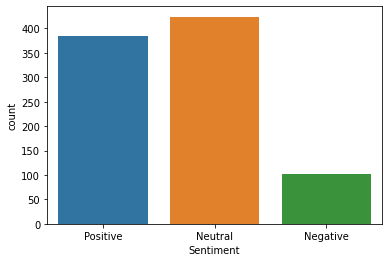

In [ ]:
patagonia.groupby(['Sentiment','Sentiment Subjectivity']).describe()

patagonia['Sentiment'].value_counts()

sns.countplot(x = 'Sentiment', data = patagonia)

In [ ]:
patagonia.groupby('Sentiment')['Sentiment Subjectivity'].value_counts()

Sentiment  Sentiment Subjectivity
Negative   Objective                  53
           Subjective                 48
Neutral    Objective                 405
           Subjective                 19
Positive   Subjective                228
           Objective                 156
Name: Sentiment Subjectivity, dtype: int64

(-0.5, 399.5, 199.5, -0.5)

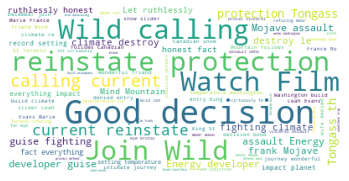

In [ ]:
unuseful_words = other_stop_words = ['missoula', '0', 'minded','mistake', 'mix', 'patagonia', 'jacket', 'half', 'shop', 'new', 'ship', 'took',                                 'scam', 'guide','scammer','zip', 'get', 'back', 'would', 'take', 'company', 
                                     'order', 'item', 'ordered', 'customer', 'email', 'product', 'never', 'bought', 'website', 'still', 'shipped', 'shipping',
                                     'use', 'last', 'first', 'store', 'even', 'make', 'purchase', 'buy', 'online', 'chat', 'used', 'one', 'called', 'told',
                                     'process', 'want', 'many', 'sent', 'received', 'another', 'clothing', 'anything', 'long', 'see', '3','4','10', 'could',
                                     'come', 'phone', 'go', 'away', 'two','around','yet','winter', 'since', 'three', 'later', 'contacted', 'asked', 'number',
                                     '20', 'almost', 'gave', 'contact', 'ever', 'know', '2', 'way', 'need', 'using', 'buying', 'really', 'blue','whale','defender' ,
                                     'co','http', 'check','good','loving','share','poshmarkapp','poshmark','tuckercarlson','projectlincoln','southern','6','right',
                                     'shopmycloset','chile','n','fxl8cos87s','mountain','via','amp','argentina','river','made','jewelsopinions','v',
                                     'wild', 'levi','thanks','woman','travel','python','fleece','att','ebay', 'short','please','l','got','rei','womeninstem','fall',
                                     'year','horbull','human','book','people','think','fish','well','g','comment','change','hike','wow','nature','celdf','world','set','environment',
                                     'park','work','100','also','1','woke','always','mckesson', "Patagonia","grantee","I","This","Thank","gear","You","give","taking", "stand","utting", "ONEV1",
                                     'We', 'DemVoice1', 'giant', 'Consider', 'The','Giving', 'holiday', 'help', 'along', 'pas' ,  'Facebook', 'u',  'keep',  'action',   'Tuesday', 'forever',   'something',  'dropped', 'form', 'turning',  'It',  'administration']

cloudview = patagonia['Preproccessed Tweets'].apply(lambda x: ' '.join(word for word in x.split() if word not in unuseful_words))


new_cloudview = pd.Series(' '.join(cloudview))
new_cloudview = new_cloudview[0]
new_cloudview

text = new_cloudview

cloud = WordCloud(background_color='white').generate(text)

plt.imshow(cloud)
plt.axis('off')


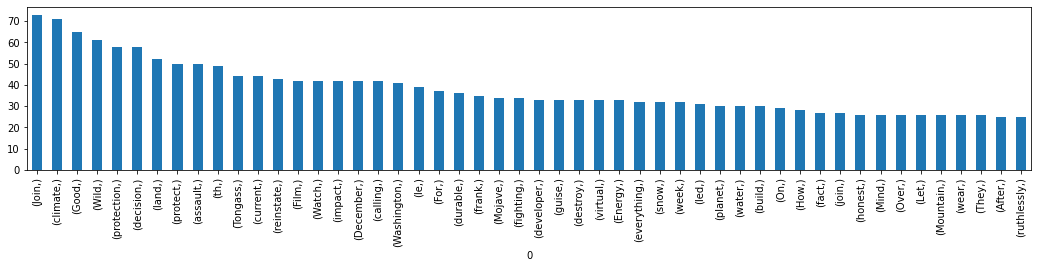

In [ ]:
frequency = pd.DataFrame(' '.join(cloudview).split()).value_counts()
frequency = frequency[:50].plot.bar(figsize=(18,3))
frequency

In [ ]:
frequency = pd.DataFrame(' '.join(cloudview).split()).value_counts()
#frequency = frequency[:50].plot.bar(figsize=(18,3))
frequency[:50]

Join          73
climate       71
Good          65
Wild          61
protection    58
decision      58
land          52
protect       50
assault       50
th            49
Tongass       44
current       44
reinstate     43
Film          42
Watch         42
impact        42
December      42
calling       42
Washington    41
le            39
For           37
durable       36
frank         35
Mojave        34
fighting      34
developer     33
guise         33
destroy       33
virtual       33
Energy        33
everything    32
snow          32
week          32
led           31
planet        30
water         30
build         30
On            29
How           28
fact          27
join          27
honest        26
Mind          26
Over          26
Let           26
Mountain      26
wear          26
They          26
After         25
ruthlessly    25
dtype: int64

In [ ]:
fashion_time = ['day', 'slow', 'minute', 'hours', 'courier', 'moment', 'minutes', 'hour', 'period', 'past', 'duration', 'time', 'space', 'next', 'next day',
                'delivery', 'quick', 'fast', 'delivered', 'week', 'ship', 'shipping', 'delivering', 'ago', 'year']
fashion_quality = ['quality', 'poor', 'inferior', 'pleasant', 'unpleasant', 'longlasting', 'sustainable', 'authentic', 'value', 'last', 'production', 'china', 'product', 'standard', 'high', 'worth']
fashion_price = ['price', 'expensive', 'money', 'cheap', 'paid', 'sale', 'sales', 'cost', 'worth', 'profit', 'price', 'prices', 'pay', 'currency', 'overprice', 'value', 'worth', 'deal', 'cash', 'overpricing', 'dime'
                 'payment', 'cost', 'costs', 'reduced']
fashion_design = ['style', 'design', 'trend', 'styles', 'classic', 'stylish', 'trendy', 'brash', 'distasteful', 'chic', 'taste', 'ugly', 'fit', 'designs', 'traditional', 'fitting', 'customise', 'classy', 'tasteful'
                  'fashionable', 'upscale', 'posh', 'fancy', 'glamorous', 'tacky', 'elegant', 'funky', 'sexy', 'glitzy', 'modern', 'shabby', 'trashy', 'old' 'fashioned']
fashion_staff = ['staff', 'manager', 'service', 'serve', 'help', 'order', 'online', 'helpful', 'assist', 'treat', 'treatment', 'customer', 'personnel', 'employee', 'office', 'worker', 'workers', 'management', 'services']




def identify_subject(review, refs):
  flag = 0
  for ref in refs:
    if review.find(ref) != -1:
      flag = 1
  return flag

patagonia['Time'] = patagonia['Preproccessed Tweets'].apply(lambda x: identify_subject(x, fashion_time))
patagonia['Quality'] = patagonia['Preproccessed Tweets'].apply(lambda x: identify_subject(x, fashion_quality))
patagonia['Price'] = patagonia['Preproccessed Tweets'].apply(lambda x: identify_subject(x, fashion_price))
patagonia['Style'] = patagonia['Preproccessed Tweets'].apply(lambda x: identify_subject(x, fashion_design))
patagonia['Service'] = patagonia['Preproccessed Tweets'].apply(lambda x: identify_subject(x, fashion_staff))

patagonia



,Tweets,TimeStamp,Preproccessed Tweets,Polarity,Subjectivity,Sentiment,Sentiment Subjectivity,Brand_Name,Brand_Type,Time,Quality,Price,Style,Service
0,@patagonia Best damn company! Very respected f...,2021-12-15 22:08:38,Best damn company Very respected stood voting ...,0.495238,0.378571,Positive,Objective,Patagonia,Ethical,0,0,0,0,0
1,RT @patagonia: Warmth when it matters. Breatha...,2021-12-15 22:08:04,Warmth matter Breathable durable weather resis...,0.000000,0.000000,Neutral,Objective,Patagonia,Ethical,0,0,0,0,0
2,How much fat is in your farmed salmon? Possibl...,2021-12-15 22:08:03,How much fat farmed salmon Possibly much indus...,0.200000,0.200000,Positive,Objective,Patagonia,Ethical,0,0,0,0,0
3,RT @patagonia: Patagonia grantee @GeorgiaStrai...,2021-12-15 22:00:15,Patagonia grantee work restore marine habitat ...,0.000000,0.000000,Neutral,Objective,Patagonia,Ethical,1,0,0,0,0
4,"RT @patagonia: This season, donate to a grassr...",2021-12-15 21:50:37,This season donate grassroots organization via...,0.400000,0.450000,Positive,Objective,Patagonia,Ethical,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,RT @patagonia: The BLM is planning to lease 18...,2021-12-10 20:22:23,The BLM planning lease 180 000 acre Wyoming pu...,0.250000,0.283333,Positive,Objective,Patagonia,Ethical,0,0,0,0,0
996,"RT @patagonia: This season, donate to a grassr...",2021-12-10 20:21:51,This season donate grassroots organization via...,0.400000,0.450000,Positive,Objective,Patagonia,Ethical,1,0,0,0,0
997,@justcallmemstee @patagonia Everyone is totall...,2021-12-10 20:19:17,Everyone totally overreacting What sheltered c...,0.000000,0.750000,Neutral,Subjective,Patagonia,Ethical,0,0,0,0,0
998,@HopewellKat @patagonia OFFS!!,2021-12-10 20:18:13,OFFS,0.000000,0.000000,Neutral,Objective,Patagonia,Ethical,0,0,0,0,0


In [ ]:
patagonia_pivot_Subject =pd.pivot_table(patagonia, index=['Sentiment'], values=['Time', 'Quality', 'Price', 'Style', 'Service'], aggfunc=np.sum)
patagonia_pivot_Subject


,Price,Quality,Service,Style,Time
Sentiment,,,,,
Negative,7,4,12,1,21
Neutral,22,33,18,13,171
Positive,30,27,19,21,132


In [ ]:
patagonia_pivot_Subject =pd.pivot_table(patagonia, index=['Sentiment Subjectivity'], values=['Time', 'Quality', 'Price', 'Style', 'Service'], aggfunc=np.sum)
patagonia_pivot_Subject   

,Price,Quality,Service,Style,Time
Sentiment Subjectivity,,,,,
Objective,34,58,32,15,326
Subjective,28,11,21,21,58


In [ ]:
import plotly.express as px

fig = px.scatter(patagonia, x="Polarity", color="Sentiment Subjectivity",
                 size='Subjectivity')
fig.show()

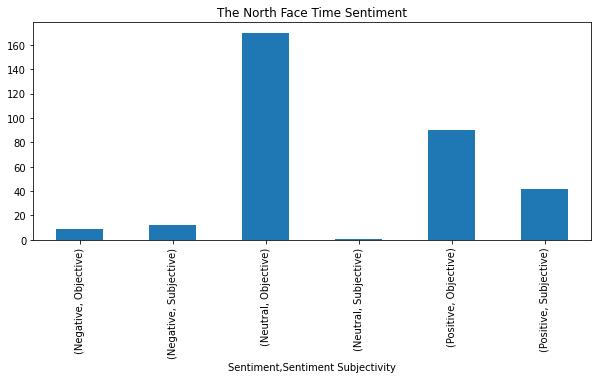

In [ ]:
patagonia_time = patagonia[patagonia['Time']==1]
patagonia_time.groupby(['Sentiment','Sentiment Subjectivity'])['Sentiment Subjectivity'].count().plot.bar(figsize=(10,4), title='The North Face Time Sentiment')


In [ ]:
patagonia_time.groupby(['Sentiment','Sentiment Subjectivity'])['Sentiment Subjectivity'].describe()

count unique         top freq
Sentiment Sentiment Subjectivity                              
Negative  Objective                  9      1   Objective    9
          Subjective                12      1  Subjective   12
Neutral   Objective                170      1   Objective  170
          Subjective                 1      1  Subjective    1
Positive  Objective                 90      1   Objective   90
          Subjective                42      1  Subjective   42

In [ ]:
patagonia_price = patagonia[patagonia['Price']==1]
patagonia_price.groupby(['Sentiment','Sentiment Subjectivity'])['Sentiment Subjectivity'].describe()

count unique         top freq
Sentiment Sentiment Subjectivity                              
Negative  Objective                  5      1   Objective    5
          Subjective                 2      1  Subjective    2
Neutral   Objective                 22      1   Objective   22
Positive  Objective                  4      1   Objective    4
          Subjective                26      1  Subjective   26

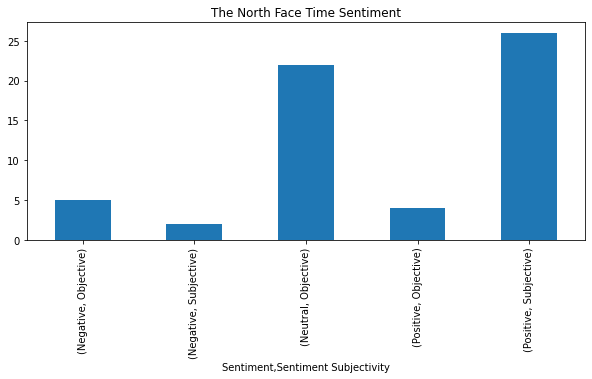

In [ ]:
patagonia_price.groupby(['Sentiment','Sentiment Subjectivity'])['Sentiment Subjectivity'].count().plot.bar(figsize=(10,4), title='The North Face Time Sentiment')

In [ ]:
patagonia_quality = patagonia[patagonia['Quality']==1]

patagonia_quality.groupby(['Sentiment','Sentiment Subjectivity'])['Sentiment Subjectivity'].describe()

count unique         top freq
Sentiment Sentiment Subjectivity                              
Negative  Objective                  3      1   Objective    3
          Subjective                 1      1  Subjective    1
Neutral   Objective                 33      1   Objective   33
Positive  Objective                 17      1   Objective   17
          Subjective                10      1  Subjective   10

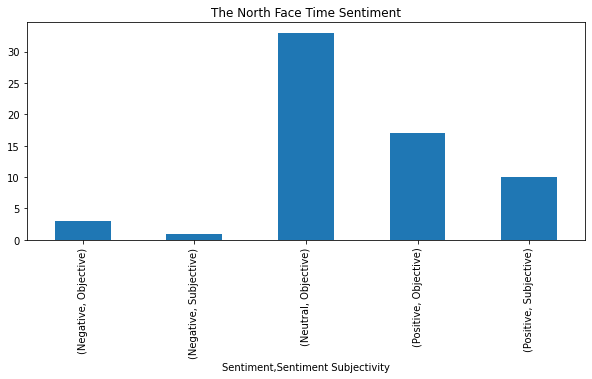

In [ ]:
patagonia_quality.groupby(['Sentiment','Sentiment Subjectivity'])['Sentiment Subjectivity'].count().plot.bar(figsize=(10,4), title='The North Face Time Sentiment')


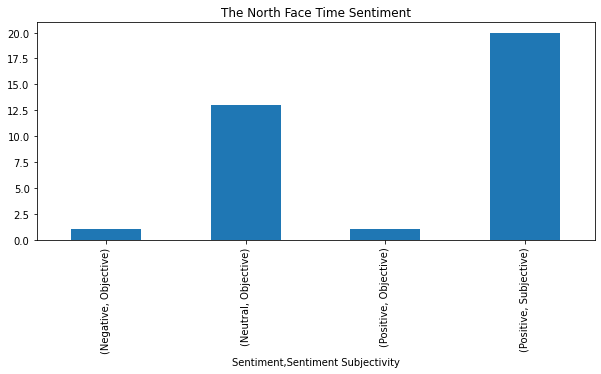

In [ ]:
patagonia_style = patagonia[patagonia['Style']==1]
patagonia_style.groupby(['Sentiment','Sentiment Subjectivity'])['Sentiment Subjectivity'].count().plot.bar(figsize=(10,4), title='The North Face Time Sentiment')

In [ ]:
patagonia_style.groupby(['Sentiment','Sentiment Subjectivity'])['Sentiment Subjectivity'].describe()


count unique         top freq
Sentiment Sentiment Subjectivity                              
Negative  Objective                  1      1   Objective    1
Neutral   Objective                 13      1   Objective   13
Positive  Objective                  1      1   Objective    1
          Subjective                20      1  Subjective   20

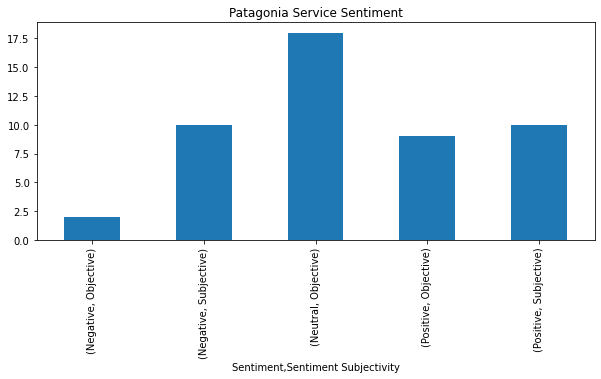

In [ ]:
patagonia_staff = patagonia[patagonia['Service']==1]
fig = px.scatter(patagonia_time, x="Polarity", color="Sentiment Subjectivity",
                 size='Subjectivity')
fig.show()


patagonia_staff.groupby(['Sentiment','Sentiment Subjectivity'])['Sentiment Subjectivity'].count().plot.bar(figsize=(10,4), title='Patagonia Service Sentiment')

In [ ]:
patagonia_staff.groupby(['Sentiment','Sentiment Subjectivity'])['Sentiment Subjectivity'].describe()


count unique         top freq
Sentiment Sentiment Subjectivity                              
Negative  Objective                  2      1   Objective    2
          Subjective                10      1  Subjective   10
Neutral   Objective                 18      1   Objective   18
Positive  Objective                  9      1   Objective    9
          Subjective                10      1  Subjective   10

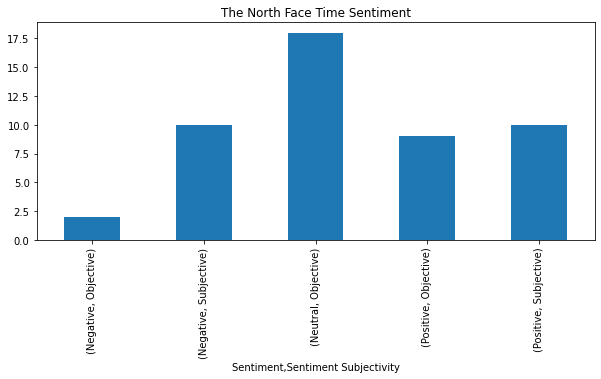

In [ ]:
patagonia_staff = patagonia[patagonia['Service']==1]
fig = px.scatter(patagonia_staff, x="Polarity", color="Sentiment Subjectivity",
                 size='Subjectivity')
fig.show()




northplot = patagonia_staff.groupby(['Sentiment','Sentiment Subjectivity'])['Sentiment Subjectivity'].count().plot.bar(figsize=(10,4), title='The North Face Time Sentiment')


# The North Face

In [ ]:
hastag = ('#thenorthface') #this is the name of the hashtag you want to do your sentiments anaysis on
query = tw.Cursor(api.search, q=hastag, lang="en", since="2015-09-16").items(1000)
tweets = [{'Tweets' : tweet.text, 'TimeStamp' : tweet.created_at} for tweet in query]

thenorthface = pd.DataFrame.from_dict(tweets)

nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
custom_stop_words = ['RT'] #custom stop word is any word you do not want in your analysis eg @, on, to, etc

def preprocess_tweets(tweet, custom_stop_words):
  preproccessed_tweet = tweet
  preproccessed_tweet = re.sub(r':', '', preproccessed_tweet)
  preproccessed_tweet = re.sub(r'â€šÃ„Â¶', '', preproccessed_tweet)
  preproccessed_tweet = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([^\x00-\x7F])", " ", preproccessed_tweet)
  preproccessed_tweet = re.sub('[^\w\s]', '', preproccessed_tweet)
  preproccessed_tweet = " ".join(word for word in preproccessed_tweet.split() if word not in stop_words)
  preproccessed_tweet = " ".join(word for word in preproccessed_tweet.split() if word not in custom_stop_words)
  preproccessed_tweet = " ".join(Word(word).lemmatize() for word in preproccessed_tweet.split())
  return preproccessed_tweet


thenorthface['Preproccessed Tweets'] = thenorthface['Tweets'].apply(lambda x: preprocess_tweets(x, custom_stop_words))


thenorthface['Polarity'] = thenorthface['Preproccessed Tweets'].apply(lambda x: TextBlob(x).sentiment[0]) #polarity gives you numbers from -1 to 1 if -ve then negative sentiments & vice versa
thenorthface['Subjectivity'] = thenorthface['Preproccessed Tweets'].apply(lambda x: TextBlob(x).sentiment[1]) #not quite clear on this but i think its how strong the negative or positive word is used eg terrible, bad, etc

thenorthface.loc[thenorthface['Polarity'] >= 0.1, 'Sentiment'] = 'Positive'
thenorthface.loc[thenorthface['Polarity'] == 0.0, 'Sentiment'] = 'Neutral'
thenorthface.loc[thenorthface['Polarity'] <= -0.1, 'Sentiment'] = 'Negative'

thenorthface.loc[thenorthface['Subjectivity'] >= 0.5, 'Sentiment Subjectivity'] = 'Subjective'
thenorthface.loc[thenorthface['Subjectivity'] <= 0.5, 'Sentiment Subjectivity'] = 'Objective'

thenorthface = thenorthface.assign(Brand_Name = 'thenorthface')
thenorthface = thenorthface.assign(Brand_Type = 'Ethical')

thenorthface


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Tweets,TimeStamp,Preproccessed Tweets,Polarity,Subjectivity,Sentiment,Sentiment Subjectivity,Brand_Name,Brand_Type
0,RT @jimkchin: 1999 Scrounging for food at the ...,2021-12-15 22:18:46,1999 Scrounging food bottom haul bag Years dir...,0.600000,0.900000,Positive,Subjective,thenorthface,Ethical
1,RT @enilev: A new journey begins. #TheNorthFac...,2021-12-15 21:54:13,A new journey begin TheNorthFacexGucci Alessan...,0.136364,0.454545,Positive,Objective,thenorthface,Ethical
2,RT @thenorthface: It’s more than a jacket. It’...,2021-12-15 21:17:32,It jacket It partner A calling History forever...,0.000000,0.000000,Neutral,Objective,thenorthface,Ethical
3,2 different vibes from @thenorthface 🏔️✨ 1 or ...,2021-12-15 20:00:37,2 different vibe 1 2 http co XVWvzurEIe,0.000000,0.600000,Neutral,Subjective,thenorthface,Ethical
4,You guys are literally the worst @thenorthface...,2021-12-15 19:35:54,You guy literally worst come online order ship...,-1.000000,1.000000,Negative,Subjective,thenorthface,Ethical
...,...,...,...,...,...,...,...,...,...
599,RT @gucci: The exploration continues. #TheNort...,2021-12-07 12:08:07,The exploration continues TheNorthFacexGucci A...,0.000000,0.000000,Neutral,Objective,thenorthface,Ethical
600,"@Jason1Phoenix @thenorthface Hi, Please send u...",2021-12-07 12:03:29,Hi Please send u DM able take look Paola HH,0.500000,0.625000,Positive,Subjective,thenorthface,Ethical
601,RT @gucci: A new journey begins. #TheNorthFace...,2021-12-07 11:27:45,A new journey begin TheNorthFacexGucci Alessan...,0.136364,0.454545,Positive,Objective,thenorthface,Ethical
602,RT @gucci: An ode to the pursuit of what lies ...,2021-12-07 11:26:13,An ode pursuit lie beyond TheNorthFacexGucci A...,0.000000,0.000000,Neutral,Objective,thenorthface,Ethical


#Analysis

In [ ]:
thenorthface.groupby(['Sentiment','Sentiment Subjectivity']).describe()


Polarity            ... Subjectivity     
                                    count      mean  ...          75%  max
Sentiment Sentiment Subjectivity                     ...                  
Negative  Objective                  15.0 -0.198611  ...     0.441667  0.5
          Subjective                 50.0 -0.432311  ...     0.900000  1.0
Neutral   Objective                 260.0  0.000000  ...     0.000000  0.5
          Subjective                  8.0  0.000000  ...     1.000000  1.0
Positive  Objective                  93.0  0.232446  ...     0.454545  0.5
          Subjective                135.0  0.505033  ...     0.900000  1.0

[6 rows x 16 columns]

In [ ]:

thenorthface.describe()

,Polarity,Subjectivity
count,604.000000,604.000000
mean,0.110521,0.345695
std,0.297306,0.346309
min,-1.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.313636
75%,0.244886,0.600000
max,1.000000,1.000000


In [ ]:
thenorthface['Sentiment'].value_counts()

Neutral     268
Positive    228
Negative     65
Name: Sentiment, dtype: int64

In [ ]:
pd.Series(' '.join(thenorthface['Preproccessed Tweets']).split()).value_counts()

http                  310
co                    305
I                     135
AlessandroMichele      74
TheNorthFacexGucci     74
                     ... 
outdoor                 1
Her                     1
stocking                1
sailed                  1
Absolutely              1
Length: 1892, dtype: int64

In [ ]:
thenorthface.groupby('Sentiment')['Sentiment Subjectivity'].value_counts()


Sentiment  Sentiment Subjectivity
Negative   Subjective                 50
           Objective                  15
Neutral    Objective                 260
           Subjective                  8
Positive   Subjective                135
           Objective                  93
Name: Sentiment Subjectivity, dtype: int64

(-0.5, 399.5, 199.5, -0.5)

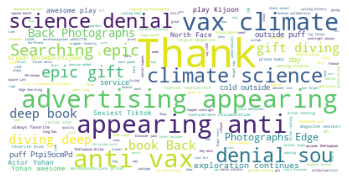

In [ ]:
unuseful_words = other_stop_words = ['missoula', '0', 'minded','mistake', 'mix', 'patagonia', 'jacket', 'half', 'shop', 'new', 'ship', 'took',                                 'scam', 'guide','scammer','zip', 'get', 'back', 'would', 'take', 'company', 
                                     'order', 'item', 'ordered', 'customer', 'email', 'product', 'never', 'bought', 'website', 'still', 'shipped', 'shipping',
                                     'use', 'last', 'first', 'store', 'even', 'make', 'purchase', 'buy', 'online', 'chat', 'used', 'one', 'called', 'told',
                                     'process', 'want', 'many', 'sent', 'received', 'another', 'clothing', 'anything', 'long', 'see', '3','4','10', 'could',
                                     'come', 'phone', 'go', 'away', 'two','around','yet','winter', 'since', 'three', 'later', 'contacted', 'asked', 'number',
                                     '20', 'almost', 'gave', 'contact', 'ever', 'know', '2', 'way', 'need', 'using', 'buying', 'really', 'gqmagazine','eastpak',
                                     'boredom','hi', 'men', 'racist', 'together', 'bord', 'piece', 'help', 'ar', 'aabout', 'also', 'die', 'cheynelempe', 'meeting',
                                     'miss', 'communicate', 'advice', 'amp', 'wu', 'quarantine', 'sad', 'talk', 'photo','vfcorp', 'getting', 'boring','let',
                                     'angelariesxo','deaal', 'chaat', 'got' , 'north' , 'face' , 'acquainted' , 'brand' , 'blacklivesmatter' , 'vans_66' , 'cheer', 
                                     'u' ,'lonly', 'quaraantine', 'investor',  'lt',  'gear',  'tommyhilfiger' ,'call' , 'wondering' ,'meon' , 'n',  'good' , 'everyone' ,
                                     'mountain' ,'looking' , 'board', 'hre' , 'important',  'victoriassecret' , 'aadvice'  'nourillustrates' , 'nextofficial',  'whaat' , 
                                     'streetfashion01',  'pvhcorp' , 'dal'  ,'ralphlauren' , 'togther' ,  'nike'  ,'lik'  ,'bordom',  'big',  'waants' , 'year' , 'find' , 'please' 
                                    'hey','think','timberland', 'thenorthface', 'jimkchin', 'jaredleto', 'sidetrackedmag', 'gucci', 'http', 'bored', 'lonely', 'guy', 'quarantine', 
                                     'photo', 'getting', 'let', 'hey', 'think','timberland','loneliness','deal', 'hello','eastpak','boredom','hi','men','racist', 'thenorthface',
                                     'jimkchin','jaredleto','sidetrackedmag','gucci','http','bored','lonely','guy','quarantine','sad','talk','photo','vfcorp','getting','let','hey',
                                     'think','timberland','loneliness','deal','jansport','hello','gqmagazine','eastpak','boredom','hi','men','racist','together','bord','piece', 'ar',
                                     'aabout','cchat','also','die','cheynelempe','meeting', 'amp','wu' ,'co','feel', 'someone','together','bord','piece','help','ar','aabout','cchat',
                                     'also','die','cheynelempe','meeting','beautiful', 'miss','communicate', 'advice','amp', 'wu', 'aam','made','please','ned','check','friend','letter','lonelinss','ccan','true','saad','hiking','aa','quaarantine','ok','arcteryx',
'thank','member','meen','meeen','pinterest','black','name','x','veronica','sweties','w','accquainted','public','ccompany','city', 'nourillustrates', 'aadvice', 'love',             
'stop','share','meeeen', 'someon', 'http', 'AlessandroMichele', 'TheNorthFacexGucci', 'ode', 'pursuit', 'lie', 'beyond', 'journey','begin', 'Apple18', 'white18', 'breitbart', 'hello',
 'known', 'Breitbart','I','A','It','The', 'well', 'An','We','Hello','There','Calls', 'K2vMqAy5ve', 'C', 'KNgrcYO7v8','fw03EKBdPN', 'Ptpi9ocmP'   ]

cloudview = thenorthface['Preproccessed Tweets'].apply(lambda x: ' '.join(word for word in x.split() if word not in unuseful_words))


new_cloudview = pd.Series(' '.join(cloudview))
new_cloudview = new_cloudview[0]
new_cloudview

text = new_cloudview

cloud = WordCloud(background_color='white').generate(text)

plt.imshow(cloud)
plt.axis('off')


In [ ]:
frequency = pd.DataFrame(' '.join(cloudview).split()).value_counts()
#frequency = frequency[:50].plot.bar(figsize=(18,3))

frequency[:50]

gift               24
advertising        23
anti               23
appearing          23
sou                23
science            23
vax                23
denial             23
climate            23
He                 22
book               19
c                  19
epic               18
Edge               18
fashion            18
deep               18
exploration        18
Back               18
Searching          18
diving             18
Photographs        18
Tiktok             17
This               17
continues          17
cold               16
outside            16
North              15
awesome            15
story              15
Don                15
Ptpi9ocmPd         15
puff               15
favorite           14
So                 14
service            14
Thanks             13
coat               13
play               12
collaboration      12
That               12
mine               12
always             12
People             12
Face               11
Actor              11
MoreAboutK

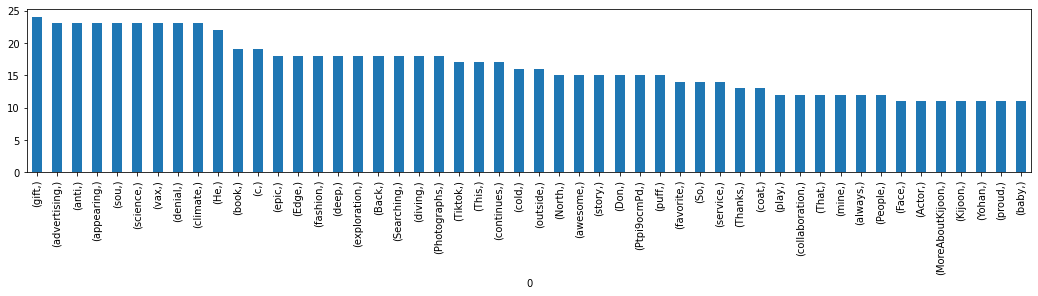

In [ ]:

frequency = pd.DataFrame(' '.join(cloudview).split()).value_counts()
frequency = frequency[:50].plot.bar(figsize=(18,3))
frequency

In [ ]:
fashion_time = ['day', 'slow', 'minute', 'hours', 'courier', 'moment', 'minutes', 'hour', 'period', 'past', 'duration', 'time', 'space', 'next', 'next day',
                'delivery', 'quick', 'fast', 'delivered', 'week', 'ship', 'shipping', 'delivering', 'ago', 'year']
fashion_quality = ['quality', 'poor', 'inferior', 'pleasant', 'unpleasant', 'longlasting', 'sustainable', 'authentic', 'value', 'last', 'production', 'china', 'product', 'standard', 'high', 'worth']
fashion_price = ['price', 'expensive', 'money', 'cheap', 'paid', 'sale', 'sales', 'cost', 'worth', 'profit', 'price', 'prices', 'pay', 'currency', 'overprice', 'value', 'worth', 'deal', 'cash', 'overpricing', 'dime'
                 'payment', 'cost', 'costs', 'reduced']
fashion_design = ['style', 'design', 'trend', 'styles', 'classic', 'stylish', 'trendy', 'brash', 'distasteful', 'chic', 'taste', 'ugly', 'fit', 'designs', 'traditional', 'fitting', 'customise', 'classy', 'tasteful'
                  'fashionable', 'upscale', 'posh', 'fancy', 'glamorous', 'tacky', 'elegant', 'funky', 'sexy', 'glitzy', 'modern', 'shabby', 'trashy', 'old' 'fashioned']
fashion_staff = ['staff', 'manager', 'service', 'serve', 'help', 'order', 'online', 'helpful', 'assist', 'treat', 'treatment', 'customer', 'personnel', 'employee', 'office', 'worker', 'workers', 'management', 'services']



def identify_subject(review, refs):
  flag = 0
  for ref in refs:
    if review.find(ref) != -1:
      flag = 1
  return flag

thenorthface['Time'] = thenorthface['Preproccessed Tweets'].apply(lambda x: identify_subject(x, fashion_time))
thenorthface['Quality'] = thenorthface['Preproccessed Tweets'].apply(lambda x: identify_subject(x, fashion_quality))
thenorthface['Price'] = thenorthface['Preproccessed Tweets'].apply(lambda x: identify_subject(x, fashion_price))
thenorthface['Style'] = thenorthface['Preproccessed Tweets'].apply(lambda x: identify_subject(x, fashion_design))
thenorthface['Service'] = thenorthface['Preproccessed Tweets'].apply(lambda x: identify_subject(x, fashion_staff))

thenorthface

,Tweets,TimeStamp,Preproccessed Tweets,Polarity,Subjectivity,Sentiment,Sentiment Subjectivity,Brand_Name,Brand_Type,Time,Quality,Price,Style,Service
0,RT @jimkchin: 1999 Scrounging for food at the ...,2021-12-15 22:18:46,1999 Scrounging food bottom haul bag Years dir...,0.600000,0.900000,Positive,Subjective,thenorthface,Ethical,0,0,0,0,0
1,RT @enilev: A new journey begins. #TheNorthFac...,2021-12-15 21:54:13,A new journey begin TheNorthFacexGucci Alessan...,0.136364,0.454545,Positive,Objective,thenorthface,Ethical,0,0,0,0,0
2,RT @thenorthface: It’s more than a jacket. It’...,2021-12-15 21:17:32,It jacket It partner A calling History forever...,0.000000,0.000000,Neutral,Objective,thenorthface,Ethical,0,0,0,0,0
3,2 different vibes from @thenorthface 🏔️✨ 1 or ...,2021-12-15 20:00:37,2 different vibe 1 2 http co XVWvzurEIe,0.000000,0.600000,Neutral,Subjective,thenorthface,Ethical,0,0,0,0,0
4,You guys are literally the worst @thenorthface...,2021-12-15 19:35:54,You guy literally worst come online order ship...,-1.000000,1.000000,Negative,Subjective,thenorthface,Ethical,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,RT @gucci: The exploration continues. #TheNort...,2021-12-07 12:08:07,The exploration continues TheNorthFacexGucci A...,0.000000,0.000000,Neutral,Objective,thenorthface,Ethical,0,0,0,0,0
600,"@Jason1Phoenix @thenorthface Hi, Please send u...",2021-12-07 12:03:29,Hi Please send u DM able take look Paola HH,0.500000,0.625000,Positive,Subjective,thenorthface,Ethical,0,0,0,0,0
601,RT @gucci: A new journey begins. #TheNorthFace...,2021-12-07 11:27:45,A new journey begin TheNorthFacexGucci Alessan...,0.136364,0.454545,Positive,Objective,thenorthface,Ethical,0,0,0,0,0
602,RT @gucci: An ode to the pursuit of what lies ...,2021-12-07 11:26:13,An ode pursuit lie beyond TheNorthFacexGucci A...,0.000000,0.000000,Neutral,Objective,thenorthface,Ethical,0,0,0,0,0


In [ ]:

thenorthface_pivot_Subject =pd.pivot_table(thenorthface, index=['Sentiment'], values=['Time', 'Quality', 'Price', 'Style', 'Service'], aggfunc=np.sum)
thenorthface_pivot_Subject

,Price,Quality,Service,Style,Time
Sentiment,,,,,
Negative,4,3,14,1,10
Neutral,7,10,19,1,27
Positive,6,10,14,7,21


In [ ]:

thenorthface_pivot_Subject =pd.pivot_table(thenorthface, index=['Sentiment Subjectivity'], values=['Time', 'Quality', 'Price', 'Style', 'Service'], aggfunc=np.sum)
thenorthface_pivot_Subject

,Price,Quality,Service,Style,Time
Sentiment Subjectivity,,,,,
Objective,13,9,30,5,47
Subjective,4,14,17,4,24


In [ ]:

import plotly.express as px

fig = px.scatter(thenorthface, x="Polarity", color="Sentiment Subjectivity",
                 size='Subjectivity')
fig.show()

In [ ]:
thenorthface_time = thenorthface[thenorthface['Time']==1]
fig = px.scatter(thenorthface_time, x="Polarity", color="Sentiment Subjectivity",
                 size='Subjectivity')
fig.show()

In [ ]:
thenorthface_time.groupby(['Sentiment','Sentiment Subjectivity'])['Sentiment Subjectivity'].describe()


count unique         top freq
Sentiment Sentiment Subjectivity                              
Negative  Objective                  6      1   Objective    6
          Subjective                 4      1  Subjective    4
Neutral   Objective                 26      1   Objective   26
          Subjective                 1      1  Subjective    1
Positive  Objective                 11      1   Objective   11
          Subjective                10      1  Subjective   10

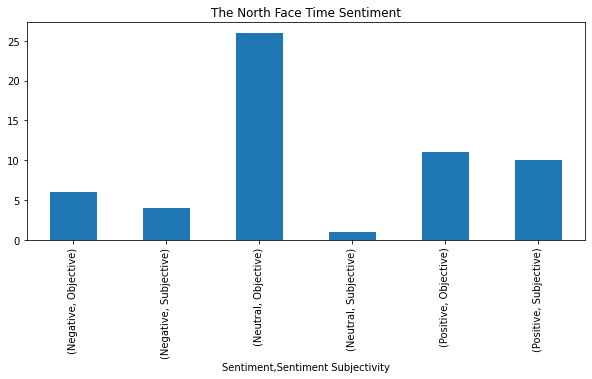

In [ ]:
northplot = thenorthface_time.groupby(['Sentiment','Sentiment Subjectivity'])['Sentiment Subjectivity'].count().plot.bar(figsize=(10,4), title='The North Face Time Sentiment')


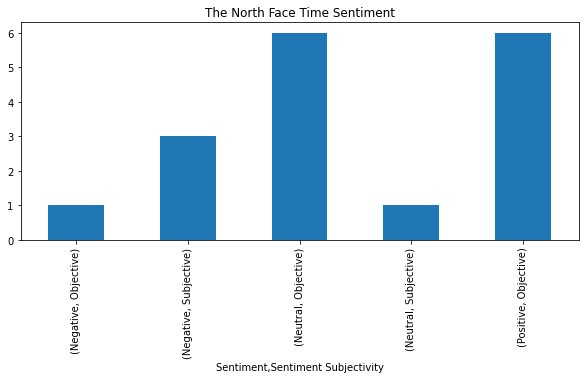

In [ ]:


thenorthface_price = thenorthface[thenorthface['Price']==1]
fig = px.scatter(thenorthface_time, x="Polarity", color="Sentiment Subjectivity",
                 size='Subjectivity')
fig.show()


thenorthface_price.groupby(['Sentiment','Sentiment Subjectivity'])['Sentiment Subjectivity'].count().plot.bar(figsize=(10,4), title='The North Face Time Sentiment')


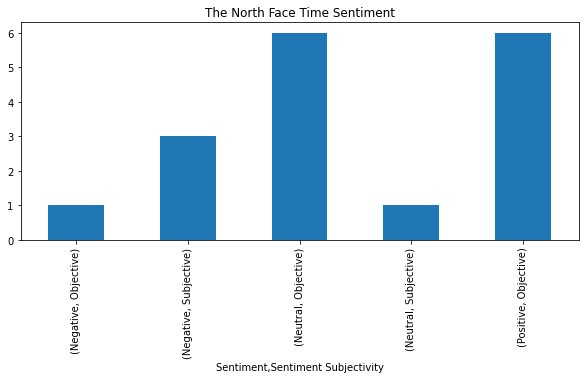

In [ ]:
thenorthface_price = thenorthface[thenorthface['Price']==1]
fig = px.scatter(thenorthface_time, x="Polarity", color="Sentiment Subjectivity",
                 size='Subjectivity')
fig.show()

thenorthface_price.groupby(['Sentiment','Sentiment Subjectivity'])['Sentiment Subjectivity'].count().plot.bar(figsize=(10,4), title='The North Face Time Sentiment')


In [ ]:
thenorthface_price.groupby(['Sentiment','Sentiment Subjectivity'])['Sentiment Subjectivity'].describe()


count unique         top freq
Sentiment Sentiment Subjectivity                              
Negative  Objective                  1      1   Objective    1
          Subjective                 3      1  Subjective    3
Neutral   Objective                  6      1   Objective    6
          Subjective                 1      1  Subjective    1
Positive  Objective                  6      1   Objective    6

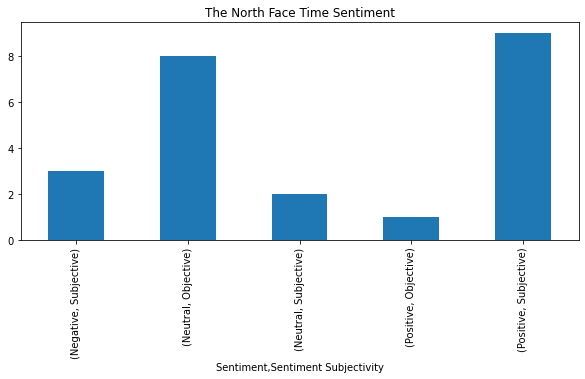

In [ ]:
thenorthface_quality = thenorthface[thenorthface['Quality']==1]
fig = px.scatter(thenorthface_quality, x="Polarity", color="Sentiment Subjectivity",
                 size='Subjectivity')
fig.show()


thenorthface_quality.groupby(['Sentiment','Sentiment Subjectivity'])['Sentiment Subjectivity'].count().plot.bar(figsize=(10,4), title='The North Face Time Sentiment')


In [ ]:
thenorthface_quality.groupby(['Sentiment','Sentiment Subjectivity'])['Sentiment Subjectivity'].describe()


count unique         top freq
Sentiment Sentiment Subjectivity                              
Negative  Subjective                 3      1  Subjective    3
Neutral   Objective                  8      1   Objective    8
          Subjective                 2      1  Subjective    2
Positive  Objective                  1      1   Objective    1
          Subjective                 9      1  Subjective    9

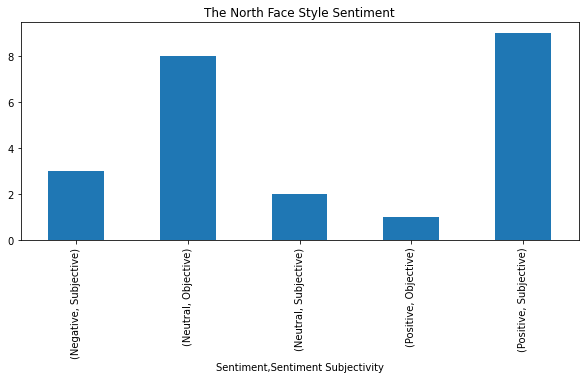

In [ ]:
thenorthface_style = thenorthface[thenorthface['Style']==1]
fig = px.scatter(thenorthface_time, x="Polarity", color="Sentiment Subjectivity",
                 size='Subjectivity')
fig.show()


thenorthface_quality.groupby(['Sentiment','Sentiment Subjectivity'])['Sentiment Subjectivity'].count().plot.bar(figsize=(10,4), title='The North Face Style Sentiment')


In [ ]:
thenorthface_style.groupby(['Sentiment','Sentiment Subjectivity'])['Sentiment Subjectivity'].describe()


count unique         top freq
Sentiment Sentiment Subjectivity                              
Negative  Objective                  1      1   Objective    1
Neutral   Objective                  1      1   Objective    1
Positive  Objective                  3      1   Objective    3
          Subjective                 4      1  Subjective    4

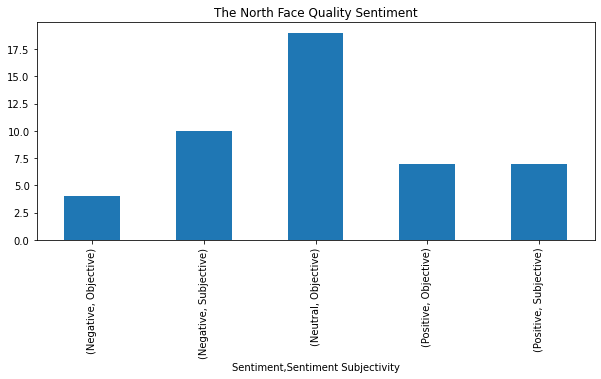

In [ ]:


thenorthface_staff = thenorthface[thenorthface['Service']==1]
fig = px.scatter(thenorthface_staff, x="Polarity", color="Sentiment Subjectivity",
                 size='Subjectivity')
fig.show()

thenorthface_staff.groupby(['Sentiment','Sentiment Subjectivity'])['Sentiment Subjectivity'].count().plot.bar(figsize=(10,4), title='The North Face Quality Sentiment')


In [ ]:
thenorthface_staff.groupby(['Sentiment','Sentiment Subjectivity'])['Sentiment Subjectivity'].describe()


count unique         top freq
Sentiment Sentiment Subjectivity                              
Negative  Objective                  4      1   Objective    4
          Subjective                10      1  Subjective   10
Neutral   Objective                 19      1   Objective   19
Positive  Objective                  7      1   Objective    7
          Subjective                 7      1  Subjective    7

#Nike

In [ ]:
hastag = ('#nike') #this is the name of the hashtag you want to do your sentiments anaysis on
query = tw.Cursor(api.search, q=hastag, lang="en", since="2015-09-16").items(1000)
tweets = [{'Tweets' : tweet.text, 'TimeStamp' : tweet.created_at} for tweet in query]

nike = pd.DataFrame.from_dict(tweets)

nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
custom_stop_words = ['RT'] #custom stop word is any word you do not want in your analysis eg @, on, to, etc

def preprocess_tweets(tweet, custom_stop_words):
  preproccessed_tweet = tweet
  preproccessed_tweet = re.sub(r':', '', preproccessed_tweet)
  preproccessed_tweet = re.sub(r'â€šÃ„Â¶', '', preproccessed_tweet)
  preproccessed_tweet = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([^\x00-\x7F])", " ", preproccessed_tweet)
  preproccessed_tweet = re.sub('[^\w\s]', '', preproccessed_tweet)
  preproccessed_tweet = " ".join(word for word in preproccessed_tweet.split() if word not in stop_words)
  preproccessed_tweet = " ".join(word for word in preproccessed_tweet.split() if word not in custom_stop_words)
  preproccessed_tweet = " ".join(Word(word).lemmatize() for word in preproccessed_tweet.split())
  return preproccessed_tweet


nike['Preproccessed Tweets'] = nike['Tweets'].apply(lambda x: preprocess_tweets(x, custom_stop_words))


nike['Polarity'] = nike['Preproccessed Tweets'].apply(lambda x: TextBlob(x).sentiment[0]) #polarity gives you numbers from -1 to 1 if -ve then negative sentiments & vice versa
nike['Subjectivity'] = nike['Preproccessed Tweets'].apply(lambda x: TextBlob(x).sentiment[1]) #not quite clear on this but i think its how strong the negative or positive word is used eg terrible, bad, etc

nike.loc[nike['Polarity'] >= 0.1, 'Sentiment'] = 'Positive'
nike.loc[nike['Polarity'] == 0.0, 'Sentiment'] = 'Neutral'
nike.loc[nike['Polarity'] <= -0.1, 'Sentiment'] = 'Negative'

nike.loc[nike['Subjectivity'] >= 0.5, 'Sentiment Subjectivity'] = 'Subjective'
nike.loc[nike['Subjectivity'] <= 0.5, 'Sentiment Subjectivity'] = 'Objective'

nike = nike.assign(Brand_Name = 'thenorthface')
nike = nike.assign(Brand_Type = 'Ethical')

nike


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Tweets,TimeStamp,Preproccessed Tweets,Polarity,Subjectivity,Sentiment,Sentiment Subjectivity,Brand_Name,Brand_Type
0,Why did @tombradby deliberately mispronounce #...,2021-12-15 23:22:45,Why deliberately mispronounce Nike tonight,0.000000,0.000000,Neutral,Objective,thenorthface,Ethical
1,Check out Pittsburgh Steelers Diontae Johnson ...,2021-12-15 23:22:30,Check Pittsburgh Steelers Diontae Johnson 18 N...,-0.283333,0.416667,Negative,Objective,thenorthface,Ethical
2,RT @whatsehunwears: 211215 Sehun for Huya Live...,2021-12-15 23:22:22,211215 Sehun Huya Live First Broadcast Dunk Lo...,0.043939,0.313333,NaN,Objective,thenorthface,Ethical
3,RT @pat_uptagrafft: Check out Nike Flex 2014 W...,2021-12-15 23:21:58,uptagrafft Check Nike Flex 2014 W box size 13C...,0.400000,0.700000,Positive,Subjective,thenorthface,Ethical
4,RT @daydreamerfore3: I am crazy that way Part ...,2021-12-15 23:20:57,I crazy way Part 2 mellos DayaneMello Nike sho...,-0.600000,0.900000,Negative,Subjective,thenorthface,Ethical
...,...,...,...,...,...,...,...,...,...
995,Hustle.\n\n#legday #legs #gym #workout #squats...,2021-12-15 08:36:37,Hustle legday leg gym workout squat curl deadl...,-0.300000,0.475000,Negative,Objective,thenorthface,Ethical
996,So good I had to share! Check out all the item...,2021-12-15 08:32:52,So good I share Check item I loving poshmark f...,0.650000,0.775000,Positive,Subjective,thenorthface,Ethical
997,KAWS × sacai × Nike Blazer Low Reed GOT’EM👟✨\n...,2021-12-15 08:32:48,KAWS sacai Nike Blazer Low Reed GOT EM nike ka...,0.000000,0.300000,Neutral,Objective,thenorthface,Ethical
998,https://t.co/RoxKMrfyvz #NIKE Skylon Ace Polar...,2021-12-15 08:32:43,http co RoxKMrfyvz NIKE Skylon Ace Polarized S...,-0.166667,0.433333,Negative,Objective,thenorthface,Ethical
